# Lecture 16: Estimation

In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Estimating enemy planes

In [2]:
N = 300
serialno = Table().with_column('Serial number', np.arange(N)+1)
serialno

Serial number
1
2
3
4
5
6
7
8
9
10


In [3]:
serialno.sample(30).column(0).max()

265

### Interlude:  appending to arrays

In [4]:
a = make_array(1, 2, 3, 4, 5)
a

array([1, 2, 3, 4, 5])

In [5]:
np.append(a, 42)

array([ 1,  2,  3,  4,  5, 42])

In [6]:
a

array([1, 2, 3, 4, 5])

In [7]:
a = np.append(a, 42)
a

array([ 1,  2,  3,  4,  5, 42])

What is the result of this code?

```
x = make_array(100, 42, 7)
x = np.append(x, 0)
x = np.append(x, 1)
x
```

A. `array([100, 42, 7])`  
B. `array([1, 0, 100, 42, 7, 0, 1])`  
C. `array([100, 42, 7, 0, 1])`  
D. I don't know  
E. none of the above  

In [8]:
x = make_array(100, 42, 7)
x = np.append(x, 0)
x = np.append(x, 1)
x

array([100,  42,   7,   0,   1])

### Simulation of estimation with max

In [9]:
sample_size = 30
repetitions = 750

maxes = make_array()

for _ in np.arange(repetitions):
    sampled_numbers = serialno.sample(sample_size).column(0)
    statistic = sampled_numbers.max()
    maxes = np.append(maxes, statistic)

estimates = Table().with_column('Sample Max', maxes)
estimates

Sample Max
289
300
298
300
291
300
296
295
293
298


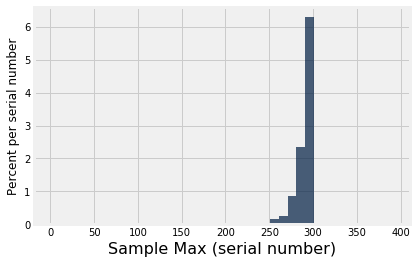

In [10]:
estimates.hist(bins=np.arange(1, N+100, 10), unit='serial number')

What would happen if we changed sample size to 10 instead of 30?

A. The histogram would spread out, with more area to the left of 300.  
B. The histogram would spread out, with more area to the right of 300.  
C. The histogram would compress, with more area concentrated around 300.  
D. I don't know  
E. None of the above  

### Simulation of estimate with average

In [11]:
2*np.mean(np.arange(1, 300+1))

301.0

In [12]:
sample_size = 30
repetitions = 750

double_averages = make_array()

for _ in np.arange(repetitions):
    sampled_numbers = serialno.sample(sample_size).column(0)
    statistic = 2 * sampled_numbers.mean()
    double_averages = np.append(double_averages, statistic)

estimates = Table().with_columns(
    '2 * average', double_averages
)

estimates

2 * average
311.133
285.4
328.733
295.733
303.867
271.867
297.867
346.6
293.067
294.333


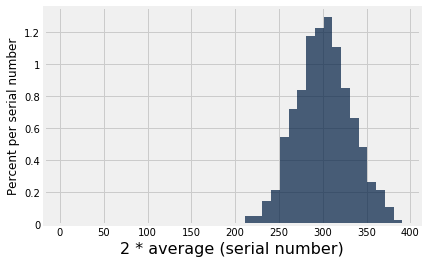

In [13]:
estimates.hist(bins=np.arange(1, N+100, 10), unit='serial number')

### Comparison of statistics

In [14]:
sample_size = 30
repetitions = 750

maxes = make_array()
double_averages = make_array()

for _ in np.arange(repetitions):
    sampled_numbers = serialno.sample(sample_size).column(0)
    maxes = np.append(maxes, sampled_numbers.max())  
    double_averages = np.append(double_averages, 2 * sampled_numbers.mean())

estimates = Table().with_columns(
    'Max', maxes,
    '2 * average', double_averages
)

estimates

Max,2 * average
287,267.333
287,316.467
281,252.6
297,375.8
268,290
297,282
299,291.867
299,262.2
287,283.067
284,280.4


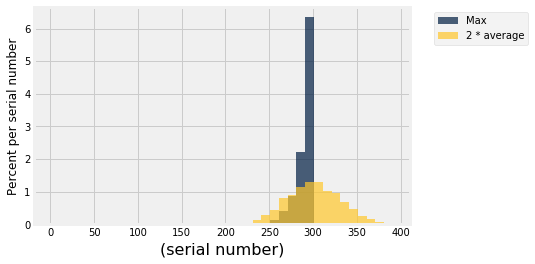

In [15]:
estimates.hist(bins=np.arange(1, N+100, 10), unit='serial number')

**Discussion question:** which estimate would be better for the Allies?